## USE CASE:PREDICTING CHURN RATE

In [122]:
#importing the necessary libraries

#numpy and pandas package
import pandas as pd  #for data reading
import numpy as np   #mathematical computation-scalars,vectors and matrices.

#Data visualization
import matplotlib.pyplot as plt  #data visualization(basic graphs)
%matplotlib inline   
import seaborn as sns   #data visualization(fascinating themes)

#importing the warnings
import warnings #messages about anomalies that may not be serious enough to be worth disrupting the program's control flow. 
warnings.filterwarnings('ignore')   #Surpress the warnings.

#from scipy import stats
from scipy import stats as st  #consist of a collection of mathematical algorithms.

#For scaling
from sklearn.preprocessing import MinMaxScaler

#For Feature Importance
from sklearn.feature_selection import RFE #Random feature Selection
from sklearn.ensemble import RandomForestClassifier

#For MLP model
from sklearn.neural_network import MLPClassifier

#Classification report
from sklearn.metrics import classification_report  #gives a summary of the performance of the model(f1-score,recall,precision)

#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix   #visual representation of the actual VS predicted




In [3]:
#loading the data
df=pd.read_csv('churn_predictor.csv')

#dimensions-(rows and columns)
df.shape

(3333, 11)

In [4]:
#first 5 observations
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


</font>
The dataset has the structure below:

| Column Name| Description| Type | Sample Values |
|---- |----|----|----|
| Churn  | Refers to terminating a subscription to a service |Categorical |0=Non-churners,1=Churners |
| Account weeks(tenure) |Refers to the number of weeeks a customer has been with the company. |Numerical | Random numbers=141,65.. |
| Contract Renewal  | Refers to the renewal of the agreement between a customer and company | Categorical| 0=No,1=Yes |
|Data plan  |Refers to the subscription of bundle offers offered by the company  | Categorical |  0=No,1=Yes |
|CustServCalls|Refers to the number of calls a customer has made to report a problem.|Numerical|eg:1call,2calls,3calls|
|Day mins|refers to number of callminutes spent during the day by a customer.|Numerical|eg:32,12,60|
|Day calls|Refers to the number of day calls made by a customer.|Numerical| eg:110,76|
|Monthly Charge|Refers to the bill that is sent to the customer at the end of the month|Numerical|eg:56.4,43.2,78.7|
|Overage fee|An extra amount of money that you have to pay for using more of something than was expected or agreed.|Numerical|eg:9.87,6.2,...|
|Roam minutes|Refers to the minutes spent by a customer when your outside your network's boundary.|Numerical|56,7.8,...|
|Data Usage|Refers to the amount of data your phone uploads or downloads using mobile data in a month |Numerical(GB)|2.7,3.7,2,...|



## 1.Hypothesis Generation
### -Based on the research questions the study generated the following hypothesis:
#### A)$H_0$:Monthly Charge does not influence churning.             Vs
####       $H_1$:Monthly Charge  influences churning.
#### B)$H_0$:Overage fee does not influence churning.                    Vs 
####      $H_1$:Overage day mins fee  influences churning.
#### C) $H_0$:Day mins does not influence churning.                       Vs  
####      $H_1$:Day mins  influences churning.
#### D)$H_0$:Customer service calls does not influence churning.  Vs  
####      $H_1$:Customer service calls influences churning.
#### E)$H_0$:Data usage does not influence churning.                       Vs     
####     $H_1$:Data usage  influences churning.


## Variable Identification and Type casting.

In [6]:
### Data category
## continuous variables-Account weeks,Data usage,cust serv calls,Day mins,Day calls,Monthly Charge,Overage fee,Roam mins.
## categorical variables-Churn,Contract renewal,Data plan.

### Type of Variable.
## target variable- churn
## predictor variables-Monthly Charge,Data Usage,Overage Fee,Day Mins,Customer Service Calls.


In [7]:
#more info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [8]:
#typecasting "churn","contract renewal" and "Dataplan" to category type
df['Churn'] = df['Churn'].astype('category')
df['ContractRenewal'] =df['ContractRenewal'].astype('category')
df['DataPlan'] = df['DataPlan'].astype('category')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Churn            3333 non-null   category
 1   AccountWeeks     3333 non-null   int64   
 2   ContractRenewal  3333 non-null   category
 3   DataPlan         3333 non-null   category
 4   DataUsage        3333 non-null   float64 
 5   CustServCalls    3333 non-null   int64   
 6   DayMins          3333 non-null   float64 
 7   DayCalls         3333 non-null   int64   
 8   MonthlyCharge    3333 non-null   float64 
 9   OverageFee       3333 non-null   float64 
 10  RoamMins         3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB


# Univariate Analysis: Numerical Variables

In [10]:
#Generation of descriptive statistics
df.describe()

,AccountWeeks,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Univariate missing values

In [11]:
#checking for missing values
df.apply(lambda x: sum(x.isnull()))

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [12]:
#checking for the skewness of the variables
df.skew()

AccountWeeks     0.096606
DataUsage        1.272057
CustServCalls    1.091359
DayMins         -0.029077
DayCalls        -0.111787
MonthlyCharge    0.594498
OverageFee      -0.023845
RoamMins        -0.245136
dtype: float64

# Graphical visualizations to understand the data distribution.

## UNIVARIATE ANALYSIS:Numerical Variables

array([[<AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

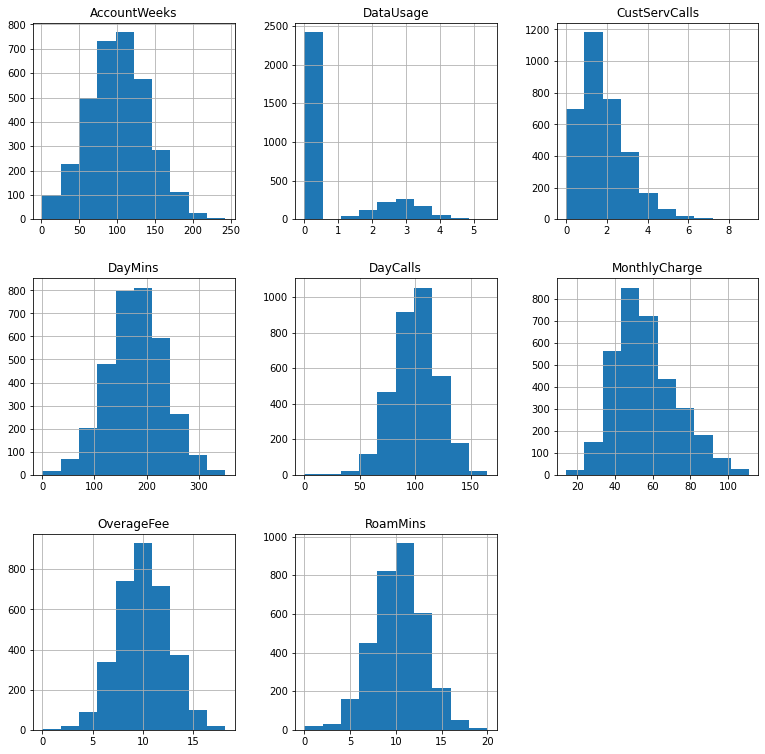

In [13]:
#Histogram of the variables
df.hist(layout = (3,3), sharex = False,figsize = (13,13))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

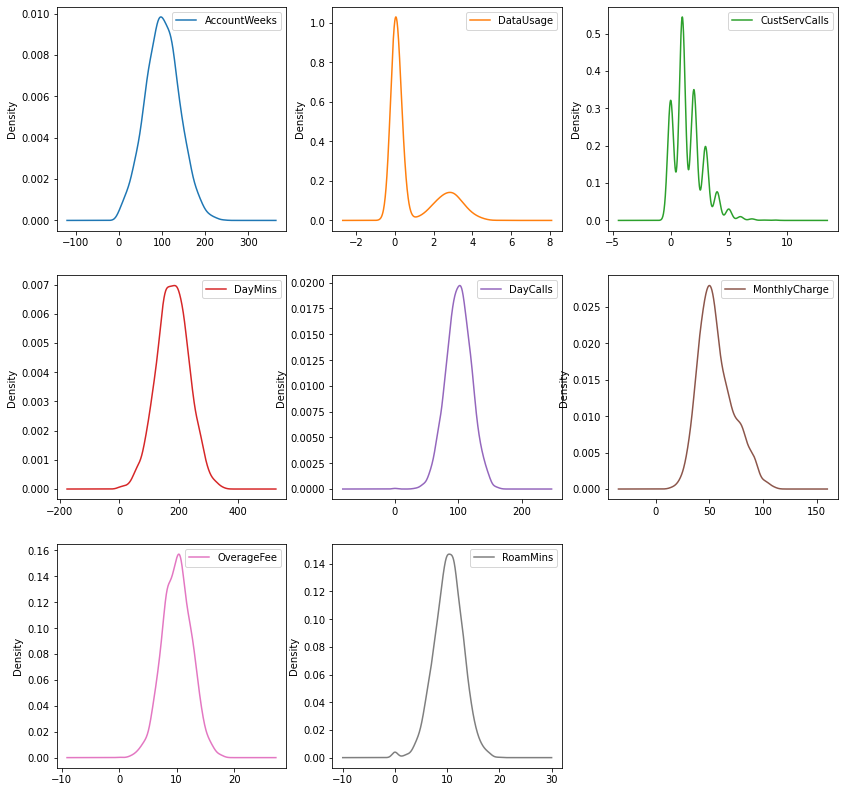

In [14]:
# Density Plots
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize = (14,14))

AccountWeeks        AxesSubplot(0.125,0.657941;0.227941x0.222059)
DataUsage        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
CustServCalls    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
DayMins             AxesSubplot(0.125,0.391471;0.227941x0.222059)
DayCalls         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
MonthlyCharge    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
OverageFee             AxesSubplot(0.125,0.125;0.227941x0.222059)
RoamMins            AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

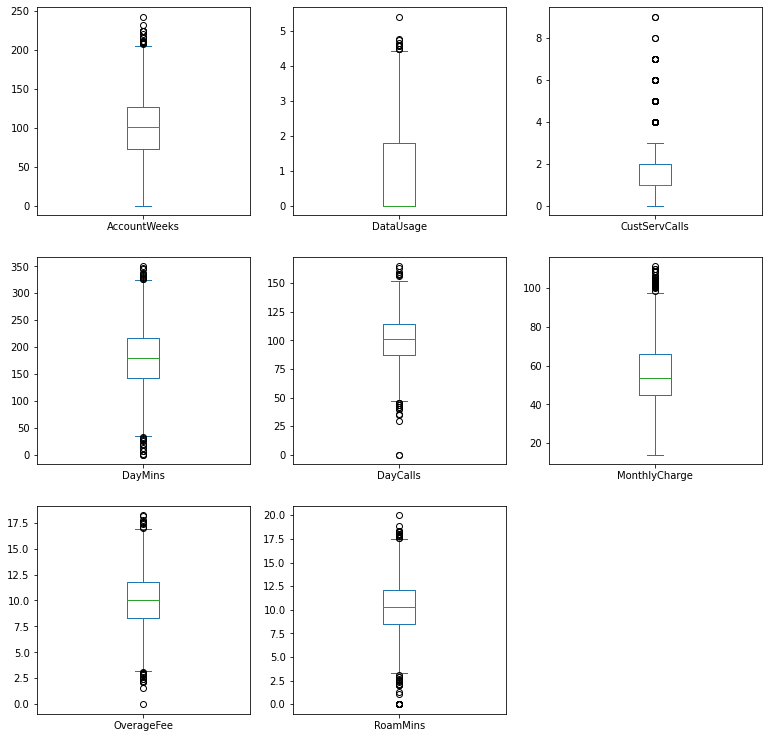

In [15]:
# Box and whisker plots
df.plot(kind='box', layout = (3,3),subplots=True, sharex=False, sharey=False,figsize = (13,13))

# Univariate Analysis:Categorical Variables

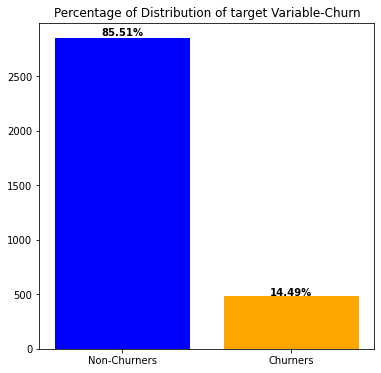

In [116]:
# CHURN
Churn=pd.DataFrame({'LABELS':['Non-Churners','Churners'],'Count':[2850,483]})
# compute percentage of each format
percentage = []
for i in range(Churn.shape[0]):
    pct = (Churn.Count[i] / 3333) * 100
    percentage.append(round(pct,2))
Churn['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(6,6))
colors_list = ['Blue','Orange']
graph = plt.bar(Churn.LABELS,Churn.Count, color = colors_list)
plt.title('Percentage of Distribution of target Variable-Churn')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(Churn.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
    
fig.savefig('churnper.png')
plt.show()

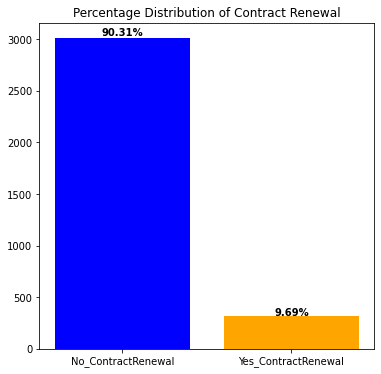

In [115]:
# Contract RenewaL
contract=pd.DataFrame({'LABELS':['No_ContractRenewal','Yes_ContractRenewal'],'Count':[3010,323]})
# compute percentage of each format
percentage = []
for i in range(contract.shape[0]):
    pct = (contract.Count[i] / 3333) * 100
    percentage.append(round(pct,2))
contract['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(6,6))
colors_list = ['Blue','Orange']
graph = plt.bar(contract.LABELS,contract.Count, color = colors_list)
plt.title('Percentage Distribution of Contract Renewal')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(contract.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
    
plt.show()

### -9.69% of the customers did not renew their contract.

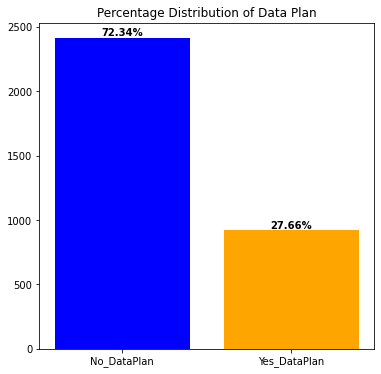

In [114]:
# Data Plan
dplan=pd.DataFrame({'LABELS':['No_DataPlan','Yes_DataPlan'],'Count':[2411,922]})
# compute percentage of each format
percentage = []
for i in range(dplan.shape[0]):
    pct = (dplan.Count[i] / 3333) * 100
    percentage.append(round(pct,2))
dplan['Percentage'] = percentage
 
# depict illustration
plt.figure(figsize=(6,6))
colors_list = ['Blue','Orange']
graph = plt.bar(dplan.LABELS,dplan.Count, color = colors_list)
plt.title('Percentage Distribution of Data Plan')
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(dplan.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
    
plt.show()

### -27.66% of the customers have a data plan

# BIVARIATE ANALYSIS

# i)Numerical-Numerical Variables

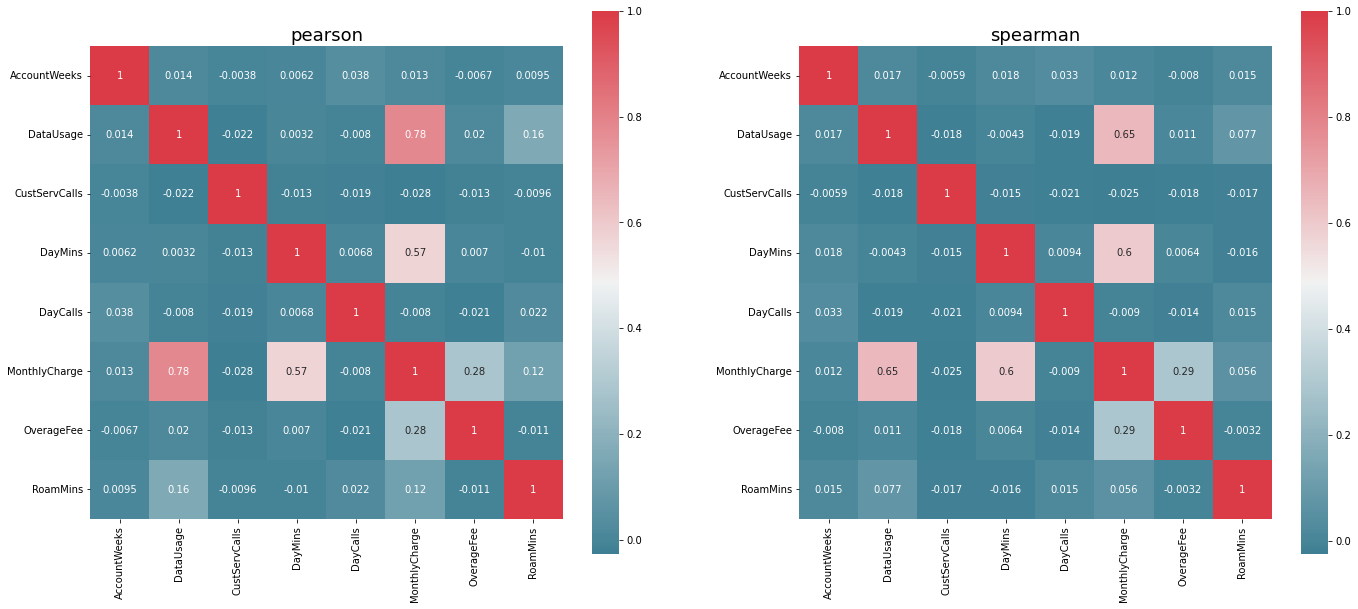

In [22]:
#correlation matrix

plt.figure(figsize=(36,10))
#create a loop through all statistical correlation methods
for j,i in enumerate(['pearson','spearman']):
    plt.subplot(1,3,j+1)
    correlation=df.corr(method=i)
    
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(correlation,square=True,annot=True,cmap=cmap)
    plt.title(i,fontsize=18)
    

#### *The variables with insignficant correlation are:account weeks,customer service calls,day calls.
#### *Major correlation lies between data usage,day mins,monthly charge,overage fee and roam mins.

# iii)Categorical-Numerical Variables

# Welch's T-test for DataUsage

In [190]:
dataUsage=df['DataUsage']
dataUsage

churn=df['Churn']
churn
dataUsage=pd.DataFrame(dataUsage)
churn=pd.DataFrame(churn)
data=pd.concat([dataUsage,churn],axis=1)
data
#define value to split on
x = 0
y= 1


#define df1 as DataFrame 
df1 = data[data['Churn'] == x]

#define df2 as DataFrame 
df2 = data[data['Churn'] == y]
df1=df1.drop(['Churn'],axis=1)
df2=df2.drop(['Churn'],axis=1)
df1.describe()
df2.describe()
stats.ttest_ind(df1,df2,equal_var=False)


Ttest_indResult(statistic=array([5.45060916]), pvalue=array([6.96050112e-08]))

In [192]:
df1.describe()

,DataUsage
count,2850.000000
mean,0.862151
std,1.286095
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.750000


In [193]:
df2.describe()

,DataUsage
count,483.000000
mean,0.546957
std,1.155352
min,0.000000
25%,0.000000
50%,0.000000
75%,0.295000
max,5.400000


# Welch's T-test for AccountWeeks

In [177]:
AccountWeeks=df['AccountWeeks']
AccountWeeks

churn=df['Churn']
churn
AccountWeeks=pd.DataFrame(AccountWeeks)
churn=pd.DataFrame(churn)
data1=pd.concat([AccountWeeks,churn],axis=1)
data1
#define value to split on
x = 0
y= 1


#define df3 as DataFrame 
df3 = data1[data1['Churn'] == x]

#define df4 as DataFrame 
df4 = data1[data1['Churn'] == y]
df3=df3.drop(['Churn'],axis=1)
df4=df4.drop(['Churn'],axis=1)
df3.describe()
df4.describe()
stats.ttest_ind(df3,df4,equal_var=False)


Ttest_indResult(statistic=array([-0.96188932]), pvalue=array([0.33645752]))

In [194]:
df3.describe()

,AccountWeeks
count,2850.000000
mean,100.793684
std,39.882350
min,1.000000
25%,73.000000
50%,100.000000
75%,127.000000
max,243.000000


In [195]:
df4.describe()

,AccountWeeks
count,483.000000
mean,102.664596
std,39.467820
min,1.000000
25%,76.000000
50%,103.000000
75%,127.000000
max,225.000000


# Welch's T-test for OverageFee

In [179]:
OverageFee=df['OverageFee']
OverageFee

churn=df['Churn']
churn
OverageFee=pd.DataFrame(OverageFee)
churn=pd.DataFrame(churn)
data2=pd.concat([OverageFee,churn],axis=1)
data2
x = 0
y= 1


#define df5 as DataFrame 
df5 = data2[data2['Churn'] == x]

#define df5 as DataFrame 
df6 = data2[data2['Churn'] == y]
df5=df5.drop(['Churn'],axis=1)
df6=df6.drop(['Churn'],axis=1)
df5.describe()
df6.describe()
stats.ttest_ind(df5,df6,equal_var=False)

Ttest_indResult(statistic=array([-5.27335663]), pvalue=array([1.82946751e-07]))

In [196]:
df5.describe()

,OverageFee
count,2850.000000
mean,9.954618
std,2.514629
min,0.000000
25%,8.230000
50%,9.980000
75%,11.660000
max,18.090000


In [197]:
df6.describe()

,OverageFee
count,483.000000
mean,10.623085
std,2.586433
min,3.550000
25%,8.860000
50%,10.570000
75%,12.475000
max,18.190000


# Welch's T-test for CustServCalls

In [181]:
CustServCalls=df['CustServCalls']
CustServCalls

churn=df['Churn']
churn
CustServCalls=pd.DataFrame(CustServCalls)
churn=pd.DataFrame(churn)
data3=pd.concat([CustServCalls,churn],axis=1)
data3
x = 0
y= 1


#define df7 as DataFrame 
df7 = data3[data3['Churn'] == x]

#define df8 as DataFrame 
df8 = data3[data3['Churn'] == y]
df7=df7.drop(['Churn'],axis=1)
df8=df8.drop(['Churn'],axis=1)
df7.describe()
df8.describe()
stats.ttest_ind(df7,df8,equal_var=False)


Ttest_indResult(statistic=array([-8.95514138]), pvalue=array([5.27004039e-18]))

In [198]:
df7.describe()

,CustServCalls
count,2850.000000
mean,1.449825
std,1.163883
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,8.000000


In [199]:
df8.describe()

,CustServCalls
count,483.000000
mean,2.229814
std,1.853275
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,9.000000


# Welch's T-test for DayMins

In [185]:
DayMins=df['DayMins']
DayMins

churn=df['Churn']
churn
DayMins=pd.DataFrame(DayMins)
churn=pd.DataFrame(churn)
data4=pd.concat([DayMins,churn],axis=1)

x = 0
y= 1


#define df9 as DataFrame 

df9 = data4[data4['Churn'] == x]

#define df10 as DataFrame
df10 = data4[data4['Churn'] == y]
df9=df9.drop(['Churn'],axis=1)
df10=df10.drop(['Churn'],axis=1)
df9.describe()
df10.describe()
stats.ttest_ind(df9,df10,equal_var=False)


Ttest_indResult(statistic=array([-9.68456296]), pvalue=array([1.21896831e-20]))

In [200]:
df9.describe()

,DayMins
count,2850.000000
mean,175.175754
std,50.181655
min,0.000000
25%,142.825000
50%,177.200000
75%,210.300000
max,315.600000


In [201]:
df10.describe()

,DayMins
count,483.000000
mean,206.914079
std,68.997792
min,0.000000
25%,153.250000
50%,217.600000
75%,265.950000
max,350.800000


# Welch's T-test for DayCalls

In [186]:
DayCalls=df['DayCalls']
DayCalls

churn=df['Churn']
churn
DayCalls=pd.DataFrame(DayCalls)
churn=pd.DataFrame(churn)
data5=pd.concat([DayCalls,churn],axis=1)

x = 0
y= 1


#define df11 as DataFrame 

df11 = data5[data5['Churn'] == x]

#define df12 as DataFrame
df12 = data5[data5['Churn'] == y]
df11=df11.drop(['Churn'],axis=1)
df12=df12.drop(['Churn'],axis=1)
df11.describe()
df12.describe()
stats.ttest_ind(df11,df12,equal_var=False)


Ttest_indResult(statistic=array([-1.00238672]), pvalue=array([0.31654343]))

In [202]:
df11.describe()

,DayCalls
count,2850.000000
mean,100.283158
std,19.801157
min,0.000000
25%,87.000000
50%,100.000000
75%,114.000000
max,163.000000


In [203]:
df12.describe()

,DayCalls
count,483.000000
mean,101.335404
std,21.582307
min,0.000000
25%,87.500000
50%,103.000000
75%,116.500000
max,165.000000


# Welch's T-test for MonthlyCharge

In [188]:
MonthlyCharge=df['MonthlyCharge']
MonthlyCharge

churn=df['Churn']
churn
MonthlyCharge=pd.DataFrame(MonthlyCharge)
churn=pd.DataFrame(churn)
data6=pd.concat([MonthlyCharge,churn],axis=1)

x = 0
y= 1


#define df13 as DataFrame 

df13 = data6[data6['Churn'] == x]

#define df14 as DataFrame
df14 = data6[data6['Churn'] == y]
df13=df13.drop(['Churn'],axis=1)
df14=df14.drop(['Churn'],axis=1)
df13.describe()
df14.describe()
stats.ttest_ind(df13,df14,equal_var=False)


Ttest_indResult(statistic=array([-4.25334727]), pvalue=array([2.40814832e-05]))

In [204]:
df13.describe()

,MonthlyCharge
count,2850.000000
mean,55.816246
std,16.439011
min,15.700000
25%,45.000000
50%,53.000000
75%,64.675000
max,111.300000


In [205]:
df14.describe()

,MonthlyCharge
count,483.000000
mean,59.190062
std,16.065479
min,14.000000
25%,45.000000
50%,63.000000
75%,69.000000
max,110.000000


# Welch's T-test for RoamMins

In [189]:
RoamMins=df['RoamMins']
RoamMins

churn=df['Churn']
churn
RoamMins=pd.DataFrame(RoamMins)
churn=pd.DataFrame(churn)
data7=pd.concat([RoamMins,churn],axis=1)

x = 0
y= 1


#define df15as DataFrame 

df15 = data7[data7['Churn'] == x]

#define df16 as DataFrame
df16 = data7[data7['Churn'] == y]
df15=df15.drop(['Churn'],axis=1)
df16=df16.drop(['Churn'],axis=1)
df15.describe()
df16.describe()
stats.ttest_ind(df15,df16,equal_var=False)


Ttest_indResult(statistic=array([-3.93885112]), pvalue=array([9.06571472e-05]))

In [206]:
df15.describe()

,RoamMins
count,2850.000000
mean,10.158877
std,2.784489
min,0.000000
25%,8.400000
50%,10.200000
75%,12.000000
max,18.900000


In [207]:
df16.describe()

,RoamMins
count,483.00000
mean,10.70000
std,2.79319
min,2.00000
25%,8.80000
50%,10.60000
75%,12.80000
max,20.00000


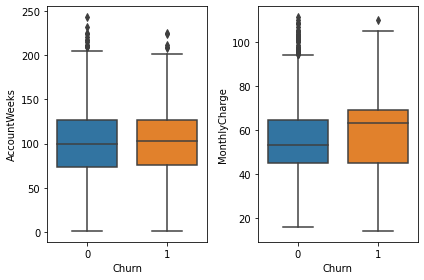

In [25]:
#Account weeks and churn ;Monthly Charge and Churn

fig,axs =plt.subplots(ncols=2)
sns.boxplot(x='Churn',y='AccountWeeks',width=0.75,data=df,ax=axs[0])
sns.boxplot(x='Churn',y='MonthlyCharge',width=0.75,data=df,ax=axs[1])
#sns.boxplot(x='Churn',y='DayMins',data=df,ax=axs[2])


#to avoid  plot from overlapping
plt.tight_layout()




    

## Insights drawn from AccountWeeks and Churn Boxplot
#### 1) 25% of the customers leave the company after 74weeks.
#### 2) 50% of the customers leave the company after 101weeks.
#### 3) 75% of the customers leave the company after 127weeks.


## Insights drawn from MonthlyCharge and Churn Boxplot
#### 1) 25% of the customers leave the company after a monthly charge of 45USD.
#### 2) 50% of the customers leave the company after a monthly charge of 63.5USD.
#### 3) 75% of the customers leave the company after a monthly charge of 66.20 USD.



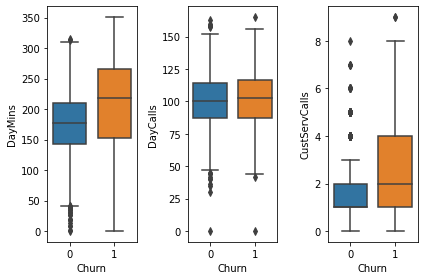

In [26]:
#DayMins ,Daycalls and churn
fig,axs=plt.subplots(ncols=3)

sns.boxplot(x='Churn',y='DayMins',data=df,width=0.75,ax=axs[0])
sns.boxplot(x='Churn',y='DayCalls',data=df,width=0.75,ax=axs[1])
sns.boxplot(x='Churn',y='CustServCalls',data=df,width=0.75,ax=axs[2])

#to prevent overlapping
plt.tight_layout()

## Insights Drawn from daymins and churn boxplot.
#### 1) 25% of the customers leave the company after spending 155mins.
#### 2) 50% of the customers leave the company after spending 215mins.
#### 3) 75% of the customers leave the company after spending 265mins.

## Insights Drawn from DayCalls and churn boxplot.
#### 1) 25% of the customers leave the company after making 87calls in a day.
#### 2) 50% of the customers leave the company after making 103calls in a day.
#### 3) 75% of the customers leave the company after making 115calls in a day.

## Insights Drawn from CustomerServCalls and churn boxplot.
#### 1) 25% of the customers leave the company after making 1 customer service call.
#### 2) 50% of the customers leave the company after making 2 customer service calls.
#### 3) 75% of the customers leave the company after making 4 customer service calls.






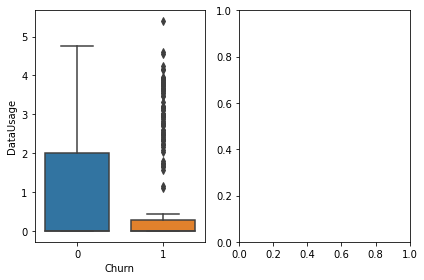

In [27]:
# Data usage and CustServCalls and churn

fig,axs=plt.subplots(ncols=2)

sns.boxplot(x='Churn',y='DataUsage',data=df,width=0.75,ax=axs[0])
#sns.boxplot(x='Churn',y='CustServCalls',data=df,width=0.75,ax=axs[1])

#to prevent overlapping
plt.tight_layout()

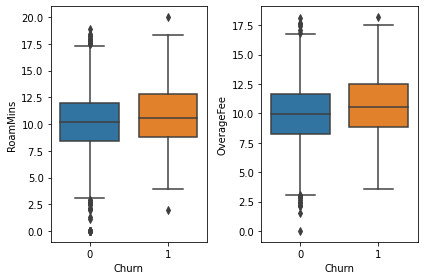

In [28]:
# Roam Mins and OverageFee

fig,axs=plt.subplots(ncols=2)

sns.boxplot(x='Churn',y='RoamMins',data=df,width=0.75,ax=axs[0])
sns.boxplot(x='Churn',y='OverageFee',data=df,width=0.75,ax=axs[1])

#to prevent overlapping
plt.tight_layout()

## Insights drawn from Roam mins and Churn boxplot
#### 1) 25% of the customers leave the company after spending 8.6 roam minutes.
#### 2) 50% of the customers leave the company after spending 10.5 roam minutes. 
#### 3) 75% of the customers leave the company after spending 12.6 roam minutes.


## Insights drawn from Overage fee and Churn boxplot
#### 1) 25% of the customers leave the company after spending 8.6 USD.
#### 2) 50% of the customers leave the company after spending 10.4 USD. 
#### 3) 75% of the customers leave the company after spending 12.5 USD.




# ii)Categorical-Categorical Variables-(CHI-SQUARE TEST STATISTIC)

In [29]:
## Categorical variables: Data plan,contract renewal,Churn(target variable).

## Is their association between a customer's subscription to a data plan and the churn rate?

In [30]:
#forming a crosstab
Dataplan_table=pd.crosstab(df['DataPlan'],df['Churn'],margins=True)
Dataplan_table.columns=['Non_churn','Churn','rowTotal']  #column headings
Dataplan_table.index=['No_Dplan','Yes_Dplan','colTotal']  #row headings

observed=Dataplan_table.iloc[0:2,0:2]

Dataplan_table


,Non_churn,Churn,rowTotal
No_Dplan,2008,403,2411
Yes_Dplan,842,80,922
colTotal,2850,483,3333


In [31]:
#calculating our expected values
expected=np.outer(Dataplan_table['rowTotal'][0:2],Dataplan_table.loc['colTotal'][0:2])/3333
expected=pd.DataFrame(expected)
expected.columns=['Non_churn','Churn']
expected.index=['No_Dplan','Yes_Dplan']
expected

,Non_churn,Churn
No_Dplan,2061.611161,349.388839
Yes_Dplan,788.388839,133.611161


In [212]:
#chi square statistic
chi_squared_stat=(((observed-expected)**2)/expected).sum().sum()
print(chi_squared_stat)

#calculating our critical value
crit=stats.chi2.ppf(q=0.95,df=1)#critical value for 95% confidence interval
crit
print('Critical value:',crit)

# calculating the p_value
p_value=1-stats.chi2.cdf(x=chi_squared_stat,df=1)
print('P_value:',p_value)


34.77733072701296
Critical value: 3.841458820694124
P_value: 3.696527195451438e-09


In [33]:
crit

3.841458820694124

###  ***Insights from the analysis***
#### -The p-value is less than 0.05,thus implying their is an association between a customer's subscription to a data plan and the churn rate.

# MULTIVARIATE ANALYSIS

In [209]:
variables=df[['MonthlyCharge','DayMins','OverageFee','CustServCalls','DataUsage','Churn','AccountWeeks','RoamMins']]
variables



,MonthlyCharge,DayMins,OverageFee,CustServCalls,DataUsage,Churn,AccountWeeks,RoamMins
0,89.0,265.1,9.87,1,2.70,0,128,10.0
1,82.0,161.6,9.78,1,3.70,0,107,13.7
2,52.0,243.4,6.06,0,0.00,0,137,12.2
3,57.0,299.4,3.10,2,0.00,0,84,6.6
4,41.0,166.7,7.42,3,0.00,0,75,10.1
...,...,...,...,...,...,...,...,...
3328,71.7,156.2,10.78,2,2.67,0,192,9.9
3329,56.4,231.1,7.67,3,0.34,0,68,9.6
3330,56.0,180.8,14.44,2,0.00,0,28,14.1
3331,50.0,213.8,7.98,2,0.00,0,184,5.0


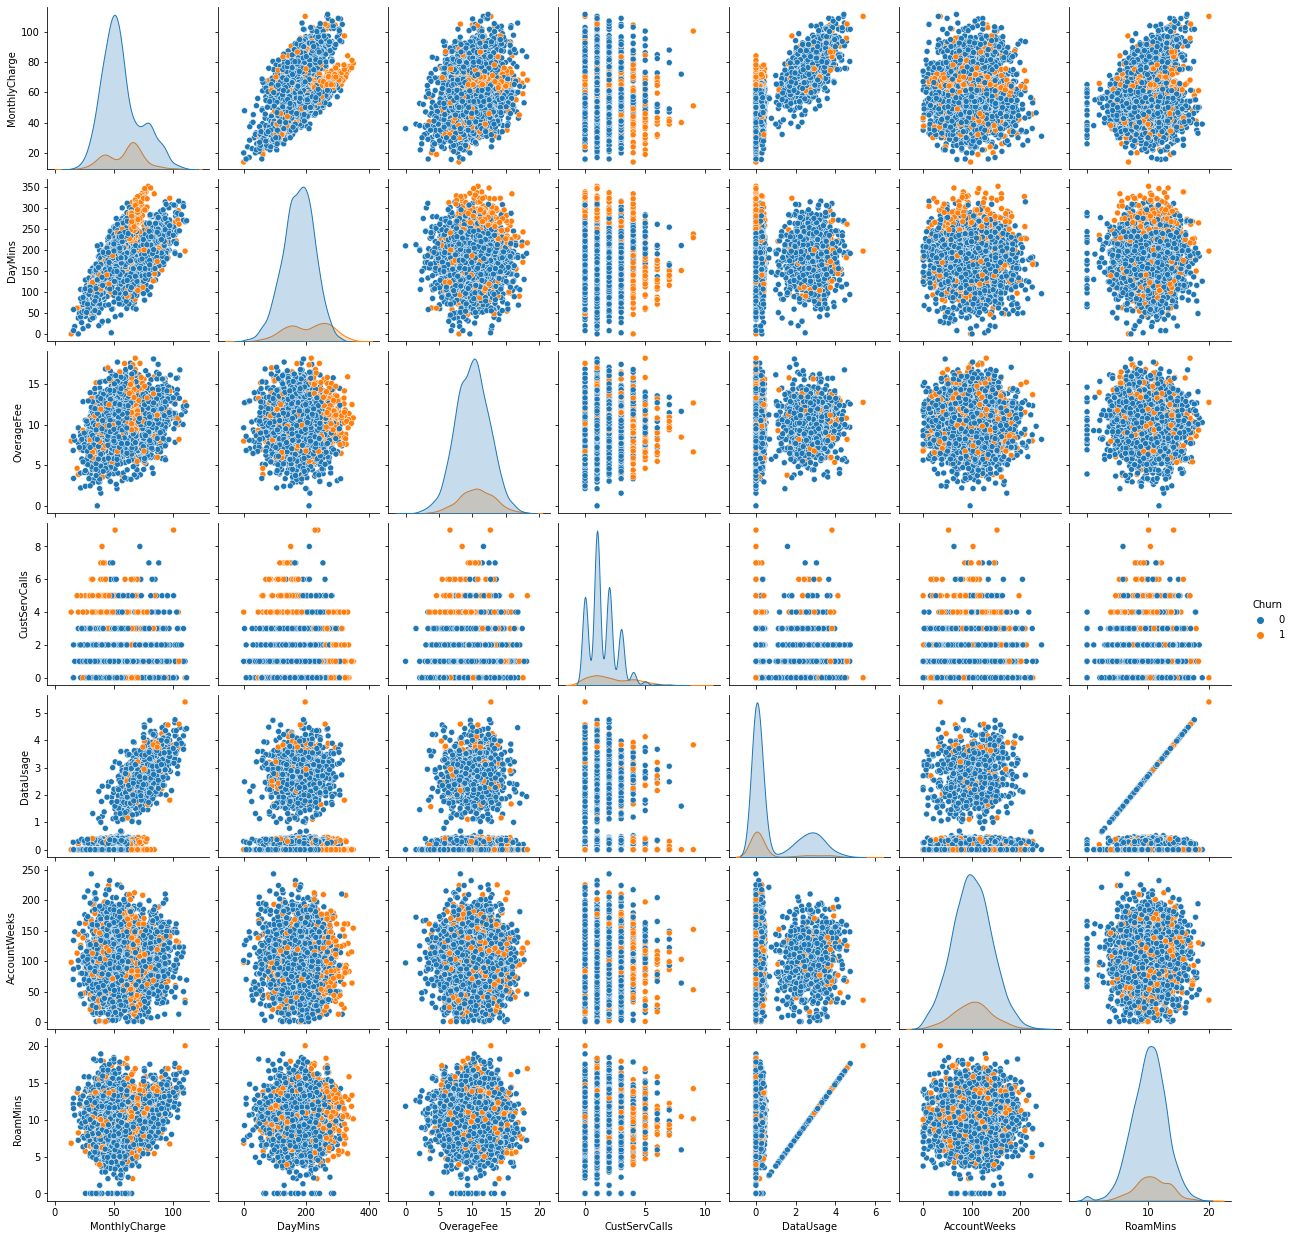

In [210]:
#plotting pairwwise relationships
sns.pairplot(important,hue='Churn')
plt.show()


### ***Insights drawn from the analysis:***
#### -Since most points in the scatter plot seem to be overlapping, we recommend  using a non-linear Machine learning algorithm. 

In [41]:
#combining the  train and test
#train=pd.concat([X_train,y_train],axis=1)
#test=pd.concat([X_test,y_test],axis=1)

#exporting files to a train and test csv file.
#train.to_csv("train_.csv",index=False)
#test.to_csv("test_.csv",index=False)

## Splitting and Training the dataset~(80%-20%)

In [42]:
#independent and dependent variable
X=df[['MonthlyCharge','DataUsage','DayMins','OverageFee','DataPlan','AccountWeeks','RoamMins','ContractRenewal','DayCalls','CustServCalls']]
y=df[['Churn']]

#splitting the dataset into training and testing data(80% and 20% respectively)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) #commonly used random states are 0 and 1.



## Data Preparation on our Training Dataset 

In [43]:
#extracting the numerical inputs in our training dataset by dropping the categorical variables
numerical_inputs=X_train.drop(['DataPlan','ContractRenewal'],axis=1)
numerical_inputs



,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls
1460,47.0,0.00,198.1,7.84,80,9.3,160,3
2000,43.0,0.00,168.2,8.09,28,10.1,87,3
666,56.0,0.00,252.0,7.51,120,9.6,120,2
2962,58.0,0.00,251.6,8.76,105,5.4,88,1
2773,78.5,1.65,247.2,11.28,134,6.1,105,2
...,...,...,...,...,...,...,...,...
835,31.0,0.00,72.7,10.43,27,9.9,75,1
3264,50.9,1.59,97.8,10.36,89,5.9,98,0
1653,42.0,0.00,131.4,10.99,93,11.1,78,1
2607,53.0,0.00,189.3,11.97,91,9.9,100,3


In [44]:
#Scaling the variables- Minimax scaler[variables will be defined in a scale of 0-1]
#defining the minmax scaler
scaler=MinMaxScaler()
#Applying the scaler to our numerical inputs in the training dataset
scaled_input=scaler.fit_transform(numerical_inputs)
scaled_inputs=pd.DataFrame(scaled_input,columns=['MonthlyCharge','DataUsage','DayMins','OverageFee','AccountWeeks','RoamMins','DayCalls','CustServCalls'])
scaled_inputs


,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls
0,0.339157,0.000000,0.564709,0.431006,0.341991,0.465,0.969697,0.333333
1,0.298047,0.000000,0.479475,0.444750,0.116883,0.505,0.527273,0.333333
2,0.431655,0.000000,0.718358,0.412864,0.515152,0.480,0.727273,0.222222
3,0.452210,0.000000,0.717218,0.481583,0.450216,0.270,0.533333,0.111111
4,0.662898,0.305556,0.704675,0.620121,0.575758,0.305,0.636364,0.222222
...,...,...,...,...,...,...,...,...
2661,0.174717,0.000000,0.207241,0.573392,0.112554,0.495,0.454545,0.111111
2662,0.379239,0.294444,0.278791,0.569544,0.380952,0.295,0.593939,0.000000
2663,0.287770,0.000000,0.374572,0.604178,0.398268,0.555,0.472727,0.111111
2664,0.400822,0.000000,0.539624,0.658054,0.389610,0.495,0.606061,0.333333


In [46]:
#extracting the categorical input variables in our training dataset
categorical_variables=X_train[['DataPlan','ContractRenewal']]

#resetting the index
categorical=categorical_variables.reset_index()

In [47]:
# joining the scaled numerical variables + categorical variables in the training dataset
train_X=pd.concat([scaled_inputs,categorical],axis=1)
train_X

,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls,index,DataPlan,ContractRenewal
0,0.339157,0.000000,0.564709,0.431006,0.341991,0.465,0.969697,0.333333,1460,0,1
1,0.298047,0.000000,0.479475,0.444750,0.116883,0.505,0.527273,0.333333,2000,0,1
2,0.431655,0.000000,0.718358,0.412864,0.515152,0.480,0.727273,0.222222,666,0,1
3,0.452210,0.000000,0.717218,0.481583,0.450216,0.270,0.533333,0.111111,2962,0,1
4,0.662898,0.305556,0.704675,0.620121,0.575758,0.305,0.636364,0.222222,2773,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2661,0.174717,0.000000,0.207241,0.573392,0.112554,0.495,0.454545,0.111111,835,0,1
2662,0.379239,0.294444,0.278791,0.569544,0.380952,0.295,0.593939,0.000000,3264,1,1
2663,0.287770,0.000000,0.374572,0.604178,0.398268,0.555,0.472727,0.111111,1653,0,0
2664,0.400822,0.000000,0.539624,0.658054,0.389610,0.495,0.606061,0.333333,2607,0,1


In [48]:
# dropping the index column
train_X=train_X.drop(['index'],axis=1)
train_X

,MonthlyCharge,DataUsage,DayMins,OverageFee,AccountWeeks,RoamMins,DayCalls,CustServCalls,DataPlan,ContractRenewal
0,0.339157,0.000000,0.564709,0.431006,0.341991,0.465,0.969697,0.333333,0,1
1,0.298047,0.000000,0.479475,0.444750,0.116883,0.505,0.527273,0.333333,0,1
2,0.431655,0.000000,0.718358,0.412864,0.515152,0.480,0.727273,0.222222,0,1
3,0.452210,0.000000,0.717218,0.481583,0.450216,0.270,0.533333,0.111111,0,1
4,0.662898,0.305556,0.704675,0.620121,0.575758,0.305,0.636364,0.222222,1,1
...,...,...,...,...,...,...,...,...,...,...
2661,0.174717,0.000000,0.207241,0.573392,0.112554,0.495,0.454545,0.111111,0,1
2662,0.379239,0.294444,0.278791,0.569544,0.380952,0.295,0.593939,0.000000,1,1
2663,0.287770,0.000000,0.374572,0.604178,0.398268,0.555,0.472727,0.111111,0,0
2664,0.400822,0.000000,0.539624,0.658054,0.389610,0.495,0.606061,0.333333,0,1


## FEATURE SELECTION

In [49]:
# Method 1---Univariate analysis
#importing feature selection libraries from sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  #for applying statistical testing

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=10)  #score function is the chisquare
ordered_feature=ordered_rank_features.fit(train_X,y_train)

#creating a dataframe of the scores
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfscores
dfcolumns=pd.DataFrame(train_X.columns)

#Combining the scores and variables
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Variables','Score']
variable_scores=features_rank.nlargest(10,'Score')  #top 10 features with respect to the scores
variable_scores

,Variables,Score
8,DataPlan,19.619046
9,ContractRenewal,17.044808
7,CustServCalls,15.719340
1,DataUsage,7.203000
2,DayMins,6.133793
0,MonthlyCharge,1.136991
3,OverageFee,0.661951
5,RoamMins,0.290062
4,AccountWeeks,0.090976
6,DayCalls,0.001075


In [50]:
scores=ordered_feature.scores_
scores.sort()
scores
vscores=variable_scores['Score']

array([1.07529531e-03, 9.09758539e-02, 2.90062323e-01, 6.61951472e-01,
       1.13699109e+00, 6.13379305e+00, 7.20299990e+00, 1.57193402e+01,
       1.70448081e+01, 1.96190456e+01])

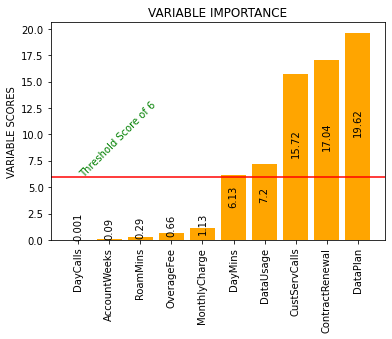

In [52]:
#bar plot of independent variable scores from least important to the most important
fig, ax = plt.subplots()
bar_plot=plt.bar(range(len(ordered_feature.scores_)),scores,color='orange')



plt.xticks([0,1,2,3,4,5,6,7,8,9],['DayCalls','AccountWeeks','RoamMins','OverageFee','MonthlyCharge','DayMins','DataUsage','CustServCalls','ContractRenewal','DataPlan'],rotation=90)
plt.ylabel('VARIABLE SCORES')
plt.title('VARIABLE IMPORTANCE')

# code for displaying the threshold line at y=0.6
plt.axhline(y = 6, color = 'r', linestyle = '-')
plt.text(0,6,'Threshold Score of 6',color = 'green',fontsize = 10,rotation=45)

bar_label =[0.001,0.09,0.29,0.66,1.13,6.13,7.20,15.72,17.04,19.62]
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=90)
        
autolabel(bar_plot)   
plt.show()
        

In [53]:
#Extracting important variables based on the threshold score
Input=train_X[['CustServCalls','DataUsage','DayMins','ContractRenewal','DataPlan']]
Input



,CustServCalls,DataUsage,DayMins,ContractRenewal,DataPlan
0,0.333333,0.000000,0.564709,1,0
1,0.333333,0.000000,0.479475,1,0
2,0.222222,0.000000,0.718358,1,0
3,0.111111,0.000000,0.717218,1,0
4,0.222222,0.305556,0.704675,1,1
...,...,...,...,...,...
2661,0.111111,0.000000,0.207241,1,0
2662,0.000000,0.294444,0.278791,1,1
2663,0.111111,0.000000,0.374572,0,0
2664,0.333333,0.000000,0.539624,1,0


In [54]:
# extracting the important variables in the test dataset
X_test=X_test[['CustServCalls','DataUsage','DayMins','ContractRenewal','DataPlan']]
#scaling the variables
X_test_scaled=scaler.fit_transform(X_test)
#converting output to dataframe
X_test=pd.DataFrame(X_test_scaled,columns=['CustServCalls','DataUsage','DayMins','ContractRenewal','DataPlan'])
X_test




,CustServCalls,DataUsage,DayMins,ContractRenewal,DataPlan
0,0.000,0.000000,0.765421,0.0,0.0
1,0.250,0.592105,0.329279,1.0,1.0
2,0.375,0.063596,0.565595,1.0,0.0
3,0.125,0.000000,0.507385,1.0,0.0
4,0.125,0.000000,1.000000,0.0,0.0
...,...,...,...,...,...
662,0.000,0.000000,0.394150,1.0,0.0
663,0.125,0.054825,0.733855,1.0,0.0
664,0.125,0.000000,0.508254,1.0,0.0
665,0.125,0.000000,0.259195,0.0,0.0


In [55]:
# Variables
## -Inputs-x_train
## -y_train
## -X_test
## -y_test

## MULTILAYER PERCEPTRON MODEL

In [56]:
#initializing the MLP Classifier
classifier=MLPClassifier(hidden_layer_sizes=(20,15),max_iter=500,activation='relu',solver='adam',random_state=1)
classifier

#fitting the training data to the network
mlpModel=classifier.fit(Input,y_train)
mlpModel


MLPClassifier(hidden_layer_sizes=(20, 15), max_iter=500, random_state=1)

In [57]:
MLP_predict=classifier.predict(X_test)
# Applying the softmax function 
MLP_softmax=classifier.predict_proba(X_test)

In [58]:
probability=pd.DataFrame(MLP_softmax)
classes=pd.DataFrame(MLP_predict)
#probabilities + classes--merging the two dataframes
predicted=pd.concat([probability,classes],axis=1)
predicted.columns=['Non-Churners(0)','Churners(1)','Predicted Class']
list(predicted)
predicted

,Non-Churners(0),Churners(1),Predicted Class
0,0.332773,0.667227,1
1,0.904626,0.095374,0
2,0.902192,0.097808,0
3,0.980542,0.019458,0
4,0.216820,0.783180,1
...,...,...,...
662,0.996217,0.003783,0
663,0.561613,0.438387,0
664,0.980281,0.019719,0
665,0.621520,0.378480,0


### - The softmax activation function is used to normalise the output of a network into probabilities.The class with the highest probability is given as the output. Eg:In row 1 the non-churners class has the highest probability thus the predicted class is 0.

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       579
           1       0.64      0.61      0.62        88

    accuracy                           0.90       667
   macro avg       0.79      0.78      0.78       667
weighted avg       0.90      0.90      0.90       667



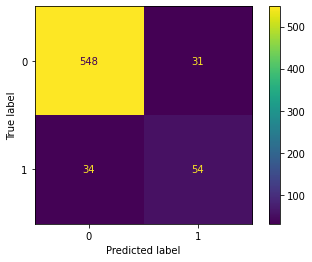

In [118]:

#confusion matrix of the MLP model.
plot_confusion_matrix(estimator=mlpModel,X=X_test,y_true=y_test,cmap='viridis')

#classification report of the MLP model
print(classification_report(y_test, MLP_predict))

In [60]:
# Computing the f1-score
from sklearn.metrics import f1_score

# Calculating f1_score
f1_score(y_test,MLP_predict)

0.6242774566473988

In [61]:
from sklearn.metrics import recall_score 

recall_score(y_test,MLP_predict)

0.6136363636363636

In [62]:
from sklearn.metrics import precision_score

precision_score(y_test,MLP_predict)

0.6352941176470588

## Visualization of the MLP

In [72]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow import keras

# Defining the model
model=keras.Sequential([
    keras.layers.Dense(20,kernel_initializer='he_normal',input_shape=(5,),activation=tf.nn.relu), #1st hidden layer and input
    keras.layers.Dense(15,kernel_initializer='he_normal',activation=tf.nn.relu), #2nd hidden layer
    keras.layers.Dense(2,activation=tf.nn.softmax) #output layer
])

In [73]:
# Compiling the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['Precision','Recall','accuracy'])



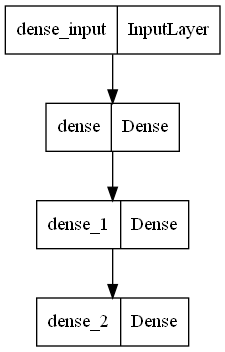

In [77]:
## Method 1:plot_model from tf
from tensorflow.keras.utils import plot_model
import graphviz
import pydot

#Visualizing the model
plot_model(model,to_file='mlp.png',show_shapes=False)

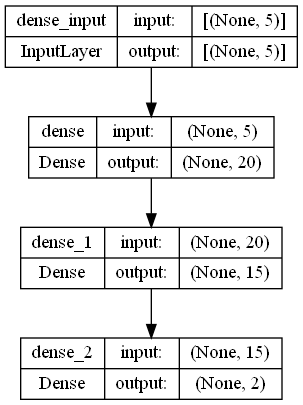

In [78]:
plot_model(model,to_file='mlp.png',show_shapes=True)

In [79]:
## Method 2:Ann Visualizer---Visualizes the neural network

from ann_visualizer.visualize import ann_viz
import graphviz

ann_viz(model,filename='project.gv',title='MULTI-LAYER PERCEPTRON MODEL FOR CHURN PREDICTION')

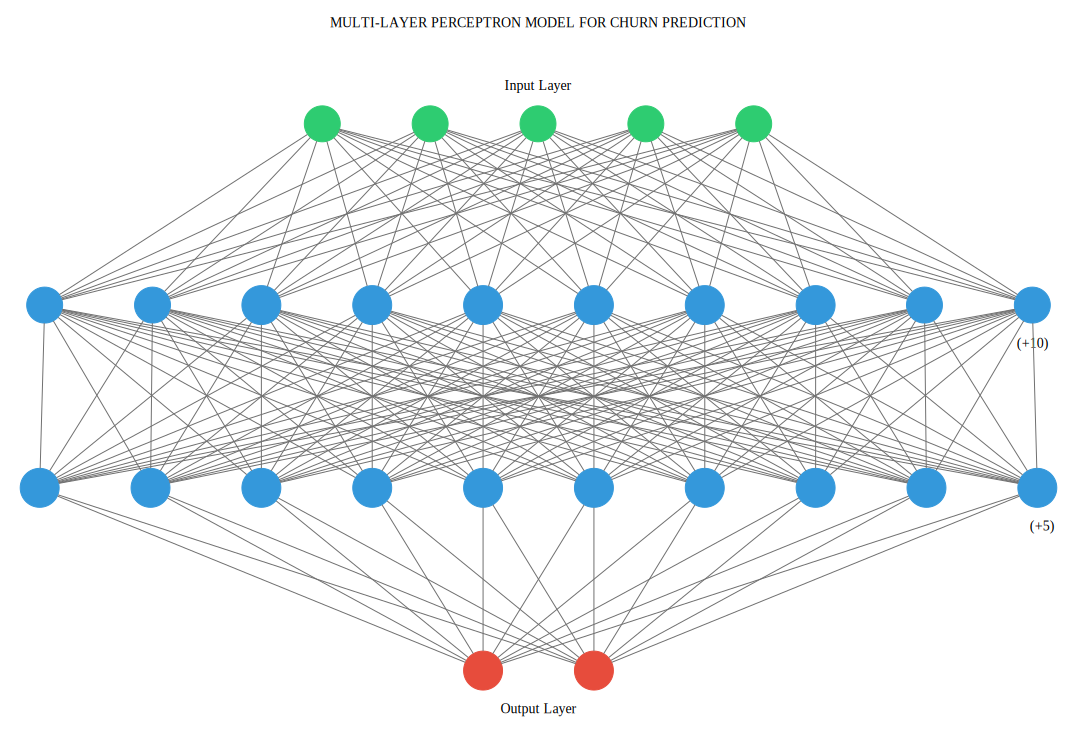

In [81]:
graph_file= graphviz.Source.from_file('project.gv')
graph_file

## Random Forest Model

In [120]:
# initializing the random forest classifier
RF= RandomForestClassifier(n_estimators = 30,random_state =1,bootstrap=False,max_depth=28,criterion='gini')
RF.fit(Input,y_train)

RandomForestClassifier(bootstrap=False, max_depth=28, n_estimators=30,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       579
           1       0.48      0.55      0.51        88

    accuracy                           0.86       667
   macro avg       0.70      0.73      0.71       667
weighted avg       0.87      0.86      0.86       667



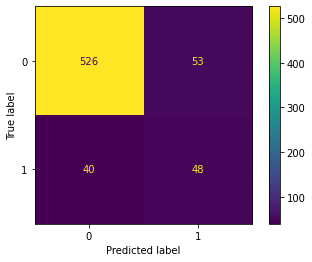

In [121]:
#Testing  the model
y_pred=RF.predict(X_test)

#confusion matrix of the MLP model.
plot_confusion_matrix(estimator=RF,X=X_test,y_true=y_test,cmap='viridis')


#classification report of the MLP model
print(classification_report(y_test,y_pred))


In [66]:
RF.estimators_[0].tree_.max_depth

28

In [67]:
Input.columns

Index(['CustServCalls', 'DataUsage', 'DayMins', 'ContractRenewal', 'DataPlan'], dtype='object')

In [68]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [69]:
features=Input.columns
features

Index(['CustServCalls', 'DataUsage', 'DayMins', 'ContractRenewal', 'DataPlan'], dtype='object')

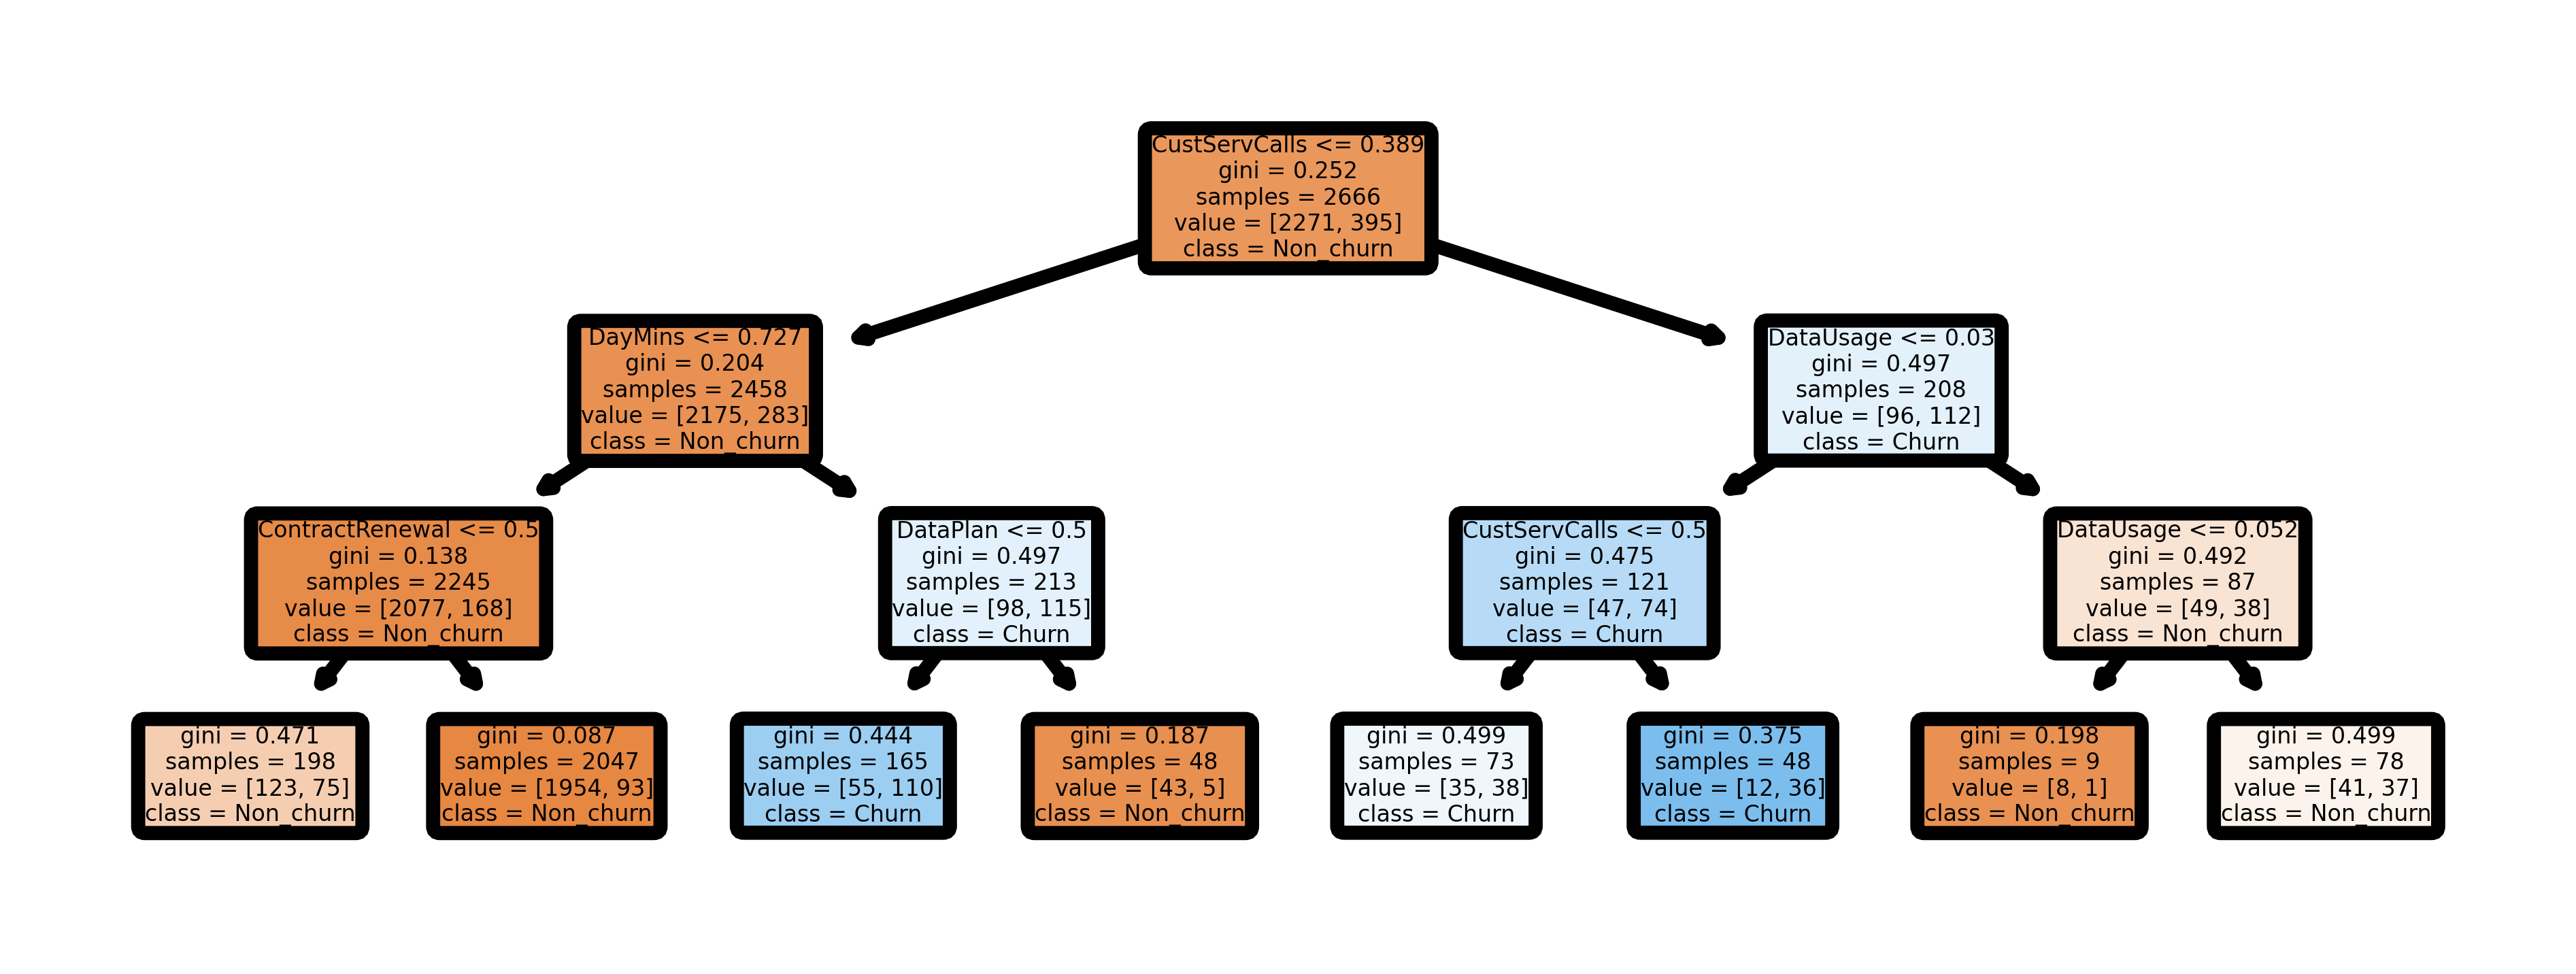

In [89]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,1), dpi=1500)
tree.plot_tree(RF.estimators_[10],feature_names=features,class_names=['Non_churn','Churn'],filled=True,rounded=True);
fig.savefig('rf_individualtree.png')

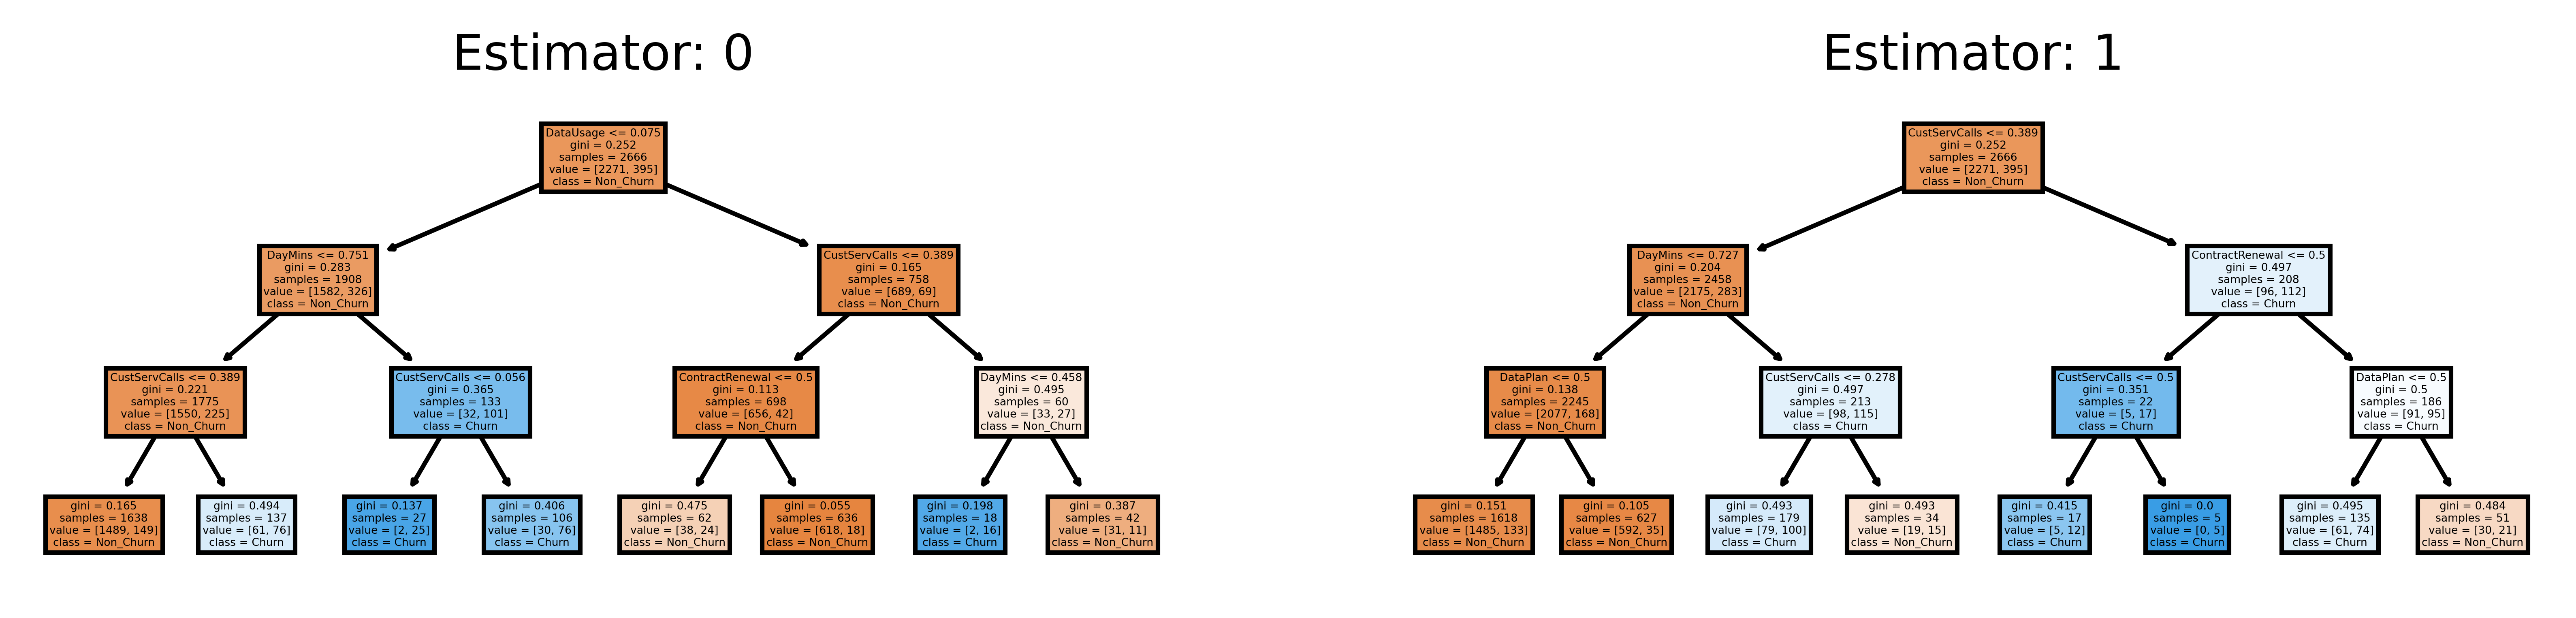

In [90]:
fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (10,2), dpi=800)
for index in range(0,2):
    tree.plot_tree(RF.estimators_[index],
                   feature_names = features, 
                   class_names=['Non_Churn','Churn'],
                   filled = True,
                   ax = axes[index]);
    
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

## COMPARISON OF THE TWO MODELS USING F1-SCORE

In [82]:
# MLP F1-score
Non_churners=[0.94,0.92]
Non_churners

# Random Forest F1-score
Churners=[0.62,0.51]
Churners

# Creating a data frame of the f1-scores
Non_Ch=pd.DataFrame(Non_churners,columns=['Non_churners'])
Non_Ch

Ch=pd.DataFrame(Churners,columns=['Churners'])
Ch

#Merging the two dataframes
scores=pd.concat([Non_Ch,Ch],axis=1)
scores

# Creating a new index
newInd='MLP RF'.split()
#Creating a new column
scores['Model']=newInd
scores
# Setting the index to a different column
scores.set_index('Model')

,Non_churners,Churners
Model,,
MLP,0.94,0.62
RF,0.92,0.51


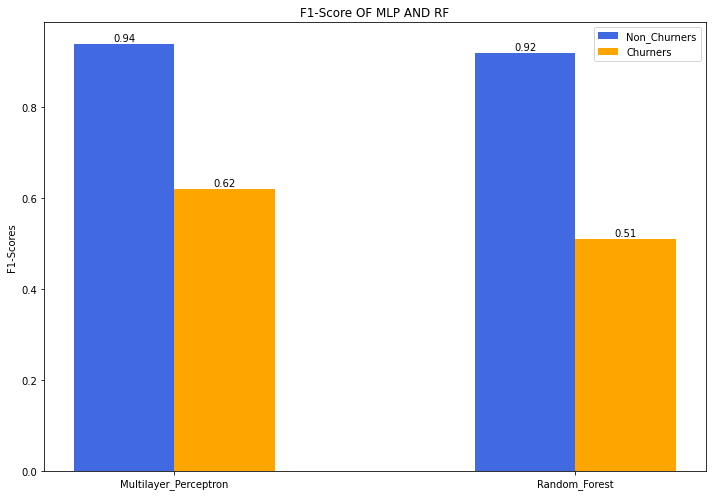

In [86]:
# Comparison of the Models between MLP and RF
labels=['Multilayer_Perceptron', 'Random_Forest']  #defining 
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2,Non_churners , width, label='Non_Churners',facecolor='RoyalBlue')
rects2 = ax.bar(x + width/2, Churners, width, label='Churners',facecolor='Orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Scores')
ax.set_title('F1-Score OF MLP AND RF')
ax.set_xticks(x, labels)
ax.legend(loc='upper right')

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

fig.tight_layout()
fig.savefig('performance.png')

plt.show()

### -Based on the graph above the F1 scores of the Multilayer Perceptron are higher compared to the F1 scores of the Random Forest.Thus making the Multilayer Perceptron a better model.